# Exercises in Classification II

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Exercise 1

In this exercise, we look at the titanic dataset, which is on Moodle in the file "titanic_survival_data.csv". 

Answer the following questions:
1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.
2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.
3. Do MinMax scaling on the training dataset.
5. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.
6. For the chosen K, train a model on the entire training dataset.
7. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.
8. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score
9. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

In [314]:
titanic = pd.read_csv('data\\titanic_survival_data_2.csv')
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.0,0,0,30.000,C


1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.


In [315]:
mean_age = round(titanic['Age'].mean(),1)
titanic['Age'] = titanic['Age'].fillna(value=mean_age)

titanic.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)

titanic

C:\Users\Hassan\AppData\Local\Temp\ipykernel_21020\1512128219.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.250,S
1,1,1,0,38.0,1,0,712.833,C
2,1,3,0,26.0,0,0,7.925,S
3,1,1,0,35.0,1,0,53.100,S
4,0,3,1,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.000,S
887,1,1,0,19.0,0,0,30.000,S
888,0,3,0,29.7,1,2,23.450,S
889,1,1,1,26.0,0,0,30.000,C


2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.

In [316]:
#y = titanic.drop(columns=['Parch', 'Fare', 'Embarked', 'Pclass', 'Sex', 'Age'])
y = titanic['Survived']
X = titanic.drop(columns=['Parch', 'Fare', 'Embarked'])
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=808)


3. Do MinMax scaling on the training dataset.

In [317]:
scaler = MinMaxScaler()
X_train_scaled_mm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) #wrapping in pd.Dataframe(...) to keep column names



5. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.

In [318]:
def knnSweepCrossValidation(X, y, maxK, folds=10):
    kacclist = []
    
    for k in range(2, maxK):
        knn = KNeighborsClassifier(n_neighbors=k)     
        scores = cross_val_score(knn, X, y, cv = folds)
        kacclist.append({"K": k, "CV accuracy": scores.mean()})

    return pd.DataFrame(kacclist)

In [319]:
cv25= knnSweepCrossValidation(X_train,y_train,25)
cv25
# The best score is determined by the highest mean accuracy from cross_val_score.
# in our case its its K3 with a score of 0.955106
# beyond K = 3 the acurracy decreases (oversmoothing/too many neighbours)

,K,CV accuracy
0,2,0.922094
1,3,0.944573
2,4,0.913094
3,5,0.926594
4,6,0.892108
5,7,0.908503
6,8,0.890638
7,9,0.901108
8,10,0.880167
9,11,0.887607


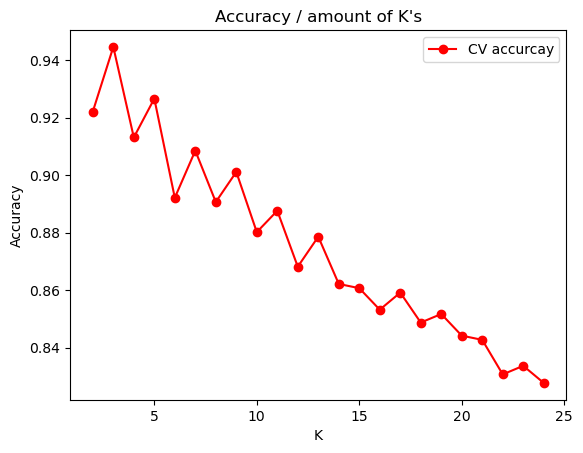

In [320]:
plt.plot(cv25["K"], cv25["CV accuracy"], label = 'CV accurcay', color='red', marker='o', linestyle='solid') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy / amount of K's")
plt.legend()

plt.show()

# 6. For the chosen K, train a model on the entire training dataset.


In [321]:
def train(x,ytrain,ytest,k):


    # training model entire training dataset
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, ytrain)

    #Evaluating on unseen test data 
    y_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(ytest, y_pred)

    print(f"Test Accuracy with K={k}: {test_accuracy:.4f}")





In [322]:
# now lets run for our best K, K = 3:
train(X_train,y_train,y_test, 3)

### K=3 ###
# Cross-Validation Accuracy	0.944573	
# Test accuracy = 0.9327 
# Generalization Gap= -0.0119

# Performs well, but looses some accuracy when testing on unseen data, i.e the generalization gap being minus.

# out of curiosity how does best_k = 5 perform? 

Test Accuracy with K=3: 0.9327


In [323]:
train(X_train,y_train,y_test, 5)

### 🤴K=5🤴 ###
# Cross-Validation Accuracy	0.9266		
# Test accuracy = 0.9417 
# Generalization Gap= +0.0151	

# K=5 has a slightly lower CV accuracy, but the test accuraccy is higher.
# that means it performs better on unseen data, and thus avoid overfitting slightly more than 🥦 K=3 🥦

Test Accuracy with K=5: 0.9417


# 7. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.


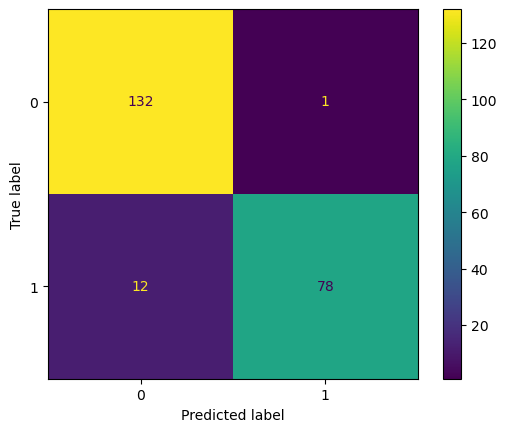

K:5
Accuracy: 0.9417040358744395
Precision: 0.9873417721518988
Recall: 0.8666666666666667
F1: 0.9230769230769231


In [324]:
def mkConfMatrix(k, X_train, X_test, y_train, y_test):
    knnX = KNeighborsClassifier(n_neighbors=k)
    knnX.fit(X_train, y_train)
    y_predX = knnX.predict(X_test)
    
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_predX)).plot()
    plt.show()
    
    print(f"K:{k}")
    print(f"Accuracy: {accuracy_score(y_test, y_predX)}")
    print(f"Precision: {precision_score(y_test, y_predX)}")
    print(f"Recall: {recall_score(y_test, y_predX)}")
    print(f"F1: {f1_score(y_test, y_predX)}")

mkConfMatrix(5,X_train, X_test, y_train, y_test.squeeze())


# we are going to do a evaluation of our best girl, K=5    
# True positives is 78
# True negatives is 132
# False positives is 1
# False negatives is 12


Accuracy = 96.85% → Very strong performance. <br>
Precision = 98.15% → Very few false positives.<br>
Recall = 93.3% → Most actual positives were identified.<br>
F1 Score = 95.6% → Good balance between precision & recall.<br>

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [325]:
adult  = pd.read_csv("data\\adult.csv")
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. Clean the `income` variable such that it has only two values


In [326]:
adult = adult.replace({"<=50K." : "<=50K", ">50K.": ">50K" })
adult['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

# 2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

In [327]:
#"age", "workclass", "fnlwgt",	"education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week",	"native-country"

X = adult.drop(columns = ["income","workclass", "fnlwgt",	"education", "marital-status", "occupation", "relationship", "capital-gain", "capital-loss", "hours-per-week",	"native-country"])
X  = pd.get_dummies(X, columns=['race', 'sex'], dtype=int, drop_first=True)
y = adult['income']
y  = pd.get_dummies(y, columns=['income'], dtype=int, drop_first=True)



In [328]:
# my Feature variables are Race and Sex, age and education num.
# turned into dummys below
X.head()


,age,education-num,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,13,0,0,0,1,1
1,50,13,0,0,0,1,1
2,38,9,0,0,0,1,1
3,53,7,0,1,0,0,1
4,28,13,0,1,0,0,0


# 3. Create X and y dataset and split the datasets into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 808)
#Here, the Dataset is broken into two parts in a ratio of 75:25
#It means 75% for model training and 25% for model testing



# 4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 


In [330]:
Knn30= knnSweepCrossValidation(X_train, y_train.squeeze(), 30)
Knn30

,K,CV accuracy
0,2,0.773880
1,3,0.766237
2,4,0.779203
3,5,0.769785
4,6,0.783954
5,7,0.781551
6,8,0.787694
7,9,0.786083
8,10,0.790697
9,11,0.786602


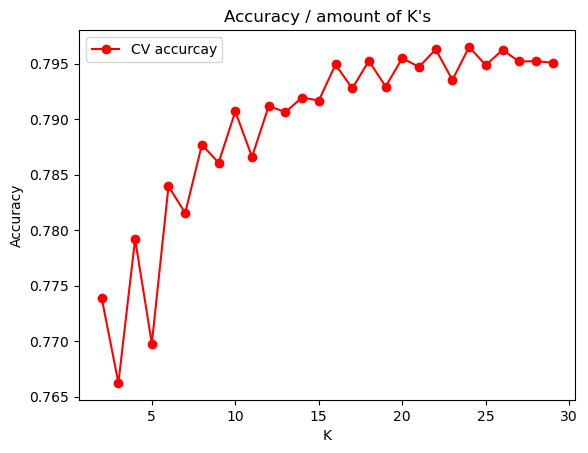

In [331]:
plt.plot(Knn30["K"], Knn30["CV accuracy"], label = 'CV accurcay', color='red', marker='o', linestyle='solid') 
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy / amount of K's")
plt.legend()

plt.show()

In [ ]:
train(X_train, y_train.squeeze(), y_test, 18)


Test Accuracy with K=18: 0.7976


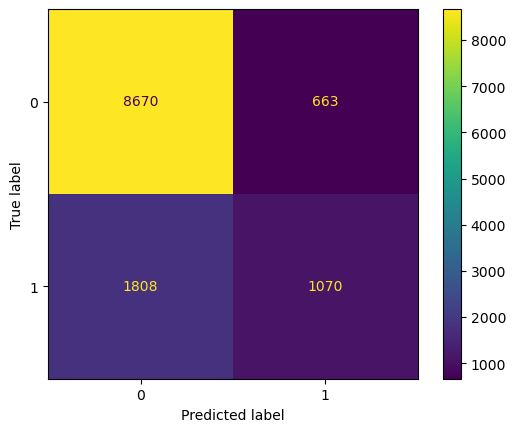

K:18
Accuracy: 0.7976414708050119
Precision: 0.6174264281592614
Recall: 0.37178596247394025
F1: 0.4641075688570809


In [337]:
mkConfMatrix(18,X_train, X_test, y_train.squeeze(), y_test)

# 5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.


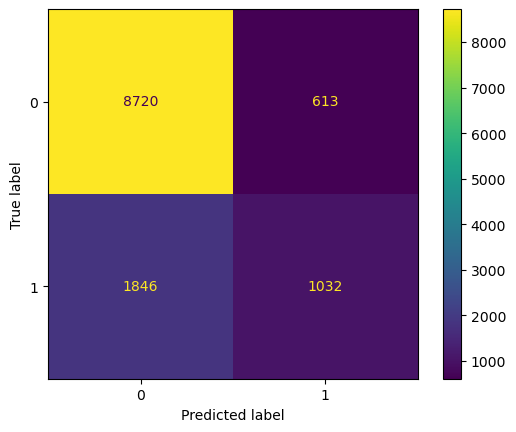


Accuracy: 0.7986241913029236 
Precision: 0.6273556231003039 
Recall: 0.35858234885337037 
F1: 0.4563342913995136


In [ ]:
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, y_train.squeeze())
logreg_y_pred_test = logreg.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, logreg_y_pred_test)).plot()
plt.show()
print(f"\nAccuracy: {accuracy_score(y_test, logreg_y_pred_test)} \nPrecision: {precision_score(y_test,logreg_y_pred_test)} \nRecall: {recall_score(y_test,logreg_y_pred_test)} \nF1: {f1_score(y_test,logreg_y_pred_test)}")


Logistic Regression has a slight edge in precision, while KNN has a slightly better recall and F1 score.
ultimately no difference here

# 6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


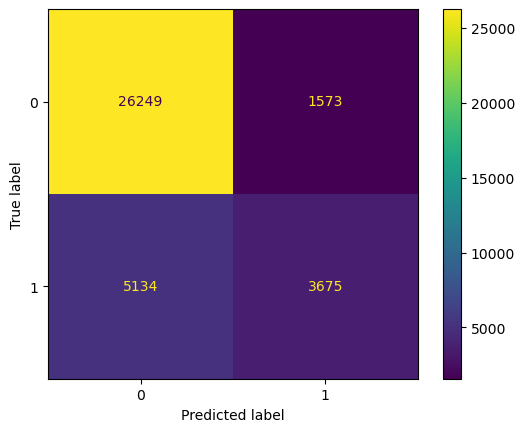


Accuracy: 0.7958398165588404 
Precision: 0.6080853453116227 
Recall: 0.3763029881862405 
F1: 0.46490663232453316


In [343]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train)).plot()
plt.show()
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_test)} \nPrecision: {precision_score(y_test,y_pred_test)} \nRecall: {recall_score(y_test,y_pred_test)} \nF1: {f1_score(y_test,y_pred_test)}")


# 7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.


In [347]:
rf_model = RandomForestClassifier() 
rf_model.fit(X_train, y_train.squeeze())
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, rf_y_pred_test)} \nPrecision: {precision_score(y_test,rf_y_pred_test)} \nRecall: {recall_score(y_test,rf_y_pred_test)} \nF1: {f1_score(y_test,rf_y_pred_test)}")




Accuracy: 0.7976414708050119 
Precision: 0.6091152815013405 
Recall: 0.39471855455177207 
F1: 0.4790217162133671


# 8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.